In [10]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, r"C:\Users\bonim\Documents\Github\ProyectoFinalFCD\ProyectoFinalCienciaDatos\src")
from common import utils

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
df = pd.read_parquet(utils.find_project_root() / "data" / "inter" / "stage2.parquet")
df

,title,url,rating,description,director,writers,stars,storyline,genres,genres_ext,...,gross_world_usd,gross_usa_canada_usd,opening_weekend_usa_canada_date,opening_weekend_usa_canada_usd,awards,nominations,voters_int,rating_stars_int,metacritic_score_int,year_int
0,Once Upon a Time... in Hollywood,https://www.imdb.com/title/tt7131622/?ref_=sr_t_1,R,As Hollywood's Golden Age is winding down duri...,[Quentin Tarantino],[Quentin Tarantino],"[Leonardo DiCaprio, Brad Pitt, Margot Robbie]",Quentin Tarantino's Once Upon a Time... in Hol...,"[Comedy, Drama]","[Period Drama, Showbiz Drama, Comedy, Drama]",...,3.921052e+08,142502728.0,"Jul 28, 2019",41082018.0,146,377,930000,7.6,84.0,2019
1,Mission: Impossible - Dead Reckoning Part One,https://www.imdb.com/title/tt9603212/?ref_=sr_t_2,PG-13,Ethan Hunt and his IMF team must track down a ...,[Christopher McQuarrie],"[Bruce Geller, Christopher McQuarrie, Erik Jen...","[Tom Cruise, Hayley Atwell, Ving Rhames]",Ethan Hunt and the IMF team must track down a ...,"[Action, Adventure, Thriller]","[Action Epic, Adventure Epic, Spy, Action, Adv...",...,5.711254e+08,172640980.0,"Jul 16, 2023",54688347.0,18,68,313000,7.6,81.0,2023
2,John Wick: Chapter 4,https://www.imdb.com/title/tt10366206/?ref_=sr...,R,John Wick uncovers a path to defeating The Hig...,[Chad Stahelski],"[Shay Hatten, Michael Finch, Derek Kolstad]","[Keanu Reeves, Laurence Fishburne, George Geor...",Condemned by the tyrannical High Table to be o...,"[Action, Crime, Thriller]","[Action Epic, Gun Fu, One-Person Army Action, ...",...,4.471425e+08,187131806.0,"Mar 26, 2023",73817950.0,38,51,394000,7.6,78.0,2023
3,The Fifth Element,https://www.imdb.com/title/tt0119116/?ref_=sr_t_4,PG-13,"In the colorful future, cabdriver Korben Dalla...",[Luc Besson],"[Luc Besson, Robert Mark Kamen]","[Bruce Willis, Milla Jovovich, Gary Oldman]","In the 23rd century, the universe is threatene...","[Action, Adventure, Sci-Fi]","[Sci-Fi Epic, Space Sci-Fi, Action, Adventure,...",...,2.639202e+08,63820180.0,"May 11, 1997",17031345.0,10,39,534000,7.6,52.0,1997
4,Watchmen,https://www.imdb.com/title/tt0409459/?ref_=sr_t_5,R,"In a version of 1985 where superheroes exist, ...",[Zack Snyder],"[Dave Gibbons, David Hayter, Alex Tse]","[Jackie Earle Haley, Patrick Wilson, Carla Gug...",It's 1985 in an alternate reality. The Watchme...,"[Action, Drama, Mystery, Sci-Fi]","[Dystopian Sci-Fi, Superhero, Action, Drama, M...",...,1.853828e+08,107509799.0,"Mar 8, 2009",55214334.0,12,24,604000,7.6,56.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,The Godfather Part II,https://www.imdb.com/title/tt0071562/?ref_=sr_...,R,The early life and career of Vito Corleone in ...,[Francis Ford Coppola],"[Francis Ford Coppola, Mario Puzo]","[Al Pacino, Robert De Niro, Robert Duvall]",The continuing saga of the Corleone crime fami...,"[Crime, Drama]","[Epic, Gangster, Tragedy, Crime, Drama]",...,4.810511e+07,47834595.0,"Nov 10, 2019",171417.0,17,21,1500000,9.0,90.0,1974
996,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/?ref_=sr_...,PG-13,Gandalf and Aragorn lead the World of Men agai...,[Peter Jackson],"[J.R.R. Tolkien, Fran Walsh, Philippa Boyens]","[Elijah Wood, Viggo Mortensen, Ian McKellen]",The final confrontation between the forces of ...,"[Adventure, Drama, Fantasy]","[Action Epic, Adventure Epic, Epic, Fantasy Ep...",...,1.139428e+09,381878219.0,"Dec 21, 2003",72629713.0,215,124,2100000,9.0,94.0,2003
997,The Dark Knight,https://www.imdb.com/title/tt0468569/?ref_=sr_...,PG-13,When a menace known as the Joker wreaks havoc ...,[Christopher Nolan],"[Jonathan Nolan, Christopher Nolan, David S. G...","[Christian Bale, Heath Ledger, Aaron Eckhart]",Set within a year after the events of Batman B...,"[Action, Crime, Drama, Thriller]","[Action Epic, Epic, Psychological Thriller, Su...",...,1.009243e+09,534987076.0,"Jul 20, 2008",158411483.0,163,165,3100000,9.1,85.0,2008
998,The Godfather,https://www.imdb

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   title                            1000 non-null   object 
 1   url                              1000 non-null   object 
 2   rating                           1000 non-null   object 
 3   description                      1000 non-null   object 
 4   director                         1000 non-null   object 
 5   writers                          1000 non-null   object 
 6   stars                            1000 non-null   object 
 7   storyline                        1000 non-null   object 
 8   genres                           1000 non-null   object 
 9   genres_ext                       1000 non-null   object 
 10  awards_and_nominations           1000 non-null   object 
 11  cast                             1000 non-null   object 
 12  box_office           

# Análisis Estadístico

In [30]:
# Primero, manejamos los valores nulos existentes como en la exploración

# Mediana más robusta ante outliers
df["budget_usd"] = df["budget_usd"].fillna( df["budget_usd"].median() )

# Media representativa de los datos
df["metacritic_score_int"] = df["metacritic_score_int"].fillna( df["metacritic_score_int"].mean() )

df.dropna(subset=['gross_world_usd'], inplace = True)

In [37]:
# Relación entre presupuesto y éxito mundial

# H0: El presupuesto de una película no afecta su éxito mundial
# H1: El presupuesto de una película si afecta su éxito mundial

bbudg = df[df["budget_usd"] > df["budget_usd"].mean()]["gross_world_usd"]
sbudg = df[df["budget_usd"] <= df["budget_usd"].mean()]["gross_world_usd"]

ttest, pvalue = stats.ttest_ind(bbudg, sbudg, equal_var = False)

if pvalue < 0.1:
    print("El presupuesto de una pelicula afecta significativamente su éxito mundial")
    if ttest > 0:
        print("Un presupuesto mayor mejora la probabilidad de éxito") 
    else:
        print("Un presupuesto mayor empeora la probabilidad de éxito") 
else:
    print("El presupuesto de una pelicula no afecta significativamente su éxito mundial")

print("t_test > ", ttest)
print("p_value > ", pvalue)

El presupuesto de una pelicula afecta significativamente su éxito mundial
Un presupuesto mayor mejora la probabilidad de éxito
t_test >  13.672154306342474
p_value >  5.387670467937967e-31


In [39]:
# Relación entre críticas y recaudación

# H0: Una película aclamada no recauda más dinero
# H1: Una película aclamada si recauda más dinero

popularm = df[df["metacritic_score_int"] > df["metacritic_score_int"].mean()]["gross_world_usd"]
lamem = df[df["metacritic_score_int"] <= df["metacritic_score_int"].mean()]["gross_world_usd"]

ttest, pvalue = stats.ttest_ind(popularm, lamem, equal_var = False)

if pvalue < 0.1:
    print("Una película críticamente aclamada recauda más dinero")
    if ttest > 0:
        print("Críticas positivas se traducen en más recaudación") 
    else:
        print("Críticas negativas se traducen en menos recaudación") 
else:
    print("No hay evidencia suficiente para afirmar que una película críticamente aclamada recauda más dinero")

print("t_test > ", ttest)
print("p_value > ", pvalue)

No hay evidencia suficiente para afirmar que una película críticamente aclamada recauda más dinero
t_test >  -0.9714747953927042
p_value >  0.3315605157857813


In [41]:
# Relación entre premios y nominaciones y mercado norteamericano

# H0: Una película con más premios no recauda más dinero en el mercado norteamericano
# H1: Una película con más premios recauda más dinero en el mercado norteamericano

north_df = df.copy()
north_df.dropna(subset=['gross_usa_canada_usd'], inplace = True)
north_df["a&n"] = north_df["awards"] + north_df["nominations"]

awardedm = north_df[north_df["a&n"] > north_df["a&n"].mean()]["gross_usa_canada_usd"]
unknownm = north_df[north_df["a&n"] <= north_df["a&n"].mean()]["gross_usa_canada_usd"]

ttest, pvalue = stats.ttest_ind(awardedm, unknownm, equal_var = False)

if pvalue < 0.1:
    print("Una película con más premios y nominaciones le va mejor en el mercado norteamericano")
    if ttest > 0:
        print("Más premios se traducen a mejor desempeño") 
    else:
        print("Más premios se traducen a peor desempeño") 
else:
    print("No hay evidencia suficiente para afirmar que los premios y nominaciones afectan el desempeño de una película en el mercado norteamericano")

print("t_test > ", ttest)
print("p_value > ", pvalue)

Una película con más premios y nominaciones le va mejor en el mercado norteamericano
Más premios se traducen a mejor desempeño
t_test >  8.330035233841318
p_value >  3.867821713302526e-15


In [46]:
# Relación entre duración y recepción

# H0: La recepción de una película es igual independientemente de la duración
# H1: La recepción de una película cambia a partir de la duración de las películas

longm = df[df["duration_mins"] > df["duration_mins"].mean()]["rating_stars_int"]
shortm = df[df["duration_mins"] <= df["duration_mins"].mean()]["rating_stars_int"]

ttest, pvalue = stats.ttest_ind(longm, shortm, equal_var = False)

if pvalue < 0.1:
    print("Una película será recibida de forma distinta en base a su duración")
    if ttest > 0:
        print("Una película más larga será recibida más favorablemente") 
    else:
        print("Una película más corta será recibida más favorablemente") 
else:
    print("No hay evidencia suficiente para afirmar que la duración de una película afecta su recepción")

print("t_test > ", ttest)
print("p_value > ", pvalue)

Una película será recibida de forma distinta en base a su duración
Una película más larga será recibida más favorablemente
t_test >  7.172767194447547
p_value >  1.691423617909048e-12


In [45]:
# Relación entre recencia y recaudación

# H0: Una película más reciente recauda dinero similar a una película más antigua
# H1: Una película más reciente recauda más dinero que una película antigua

newm = df[df["year_int"] > df["year_int"].mean()]["gross_world_usd"]
oldm = df[df["year_int"] <= df["year_int"].mean()]["gross_world_usd"]

ttest, pvalue = stats.ttest_ind(newm, oldm, equal_var = False)

if pvalue < 0.1:
    if ttest > 0:
        print("Una película moderna recaudará más dinero") 
    else:
        print("Una película moderna recaudará menos dinero") 
else:
    print("No hay evidencia suficiente para afirmar que la recencia de una película afecta su recaudación")

print("t_test > ", ttest)
print("p_value > ", pvalue)

Una película moderna recaudará más dinero
t_test >  10.077317437039914
p_value >  1.6963654440483122e-22


# Análisis PCA

In [51]:
# Eliminamos datos irrelevantes e incompatibles
num_df = df.select_dtypes(include=['number'])
num_df.dropna(inplace = True)

# Análisis de Componentes Principales
pca = PCA(None)
X_pca = pca.fit_transform(num_df)

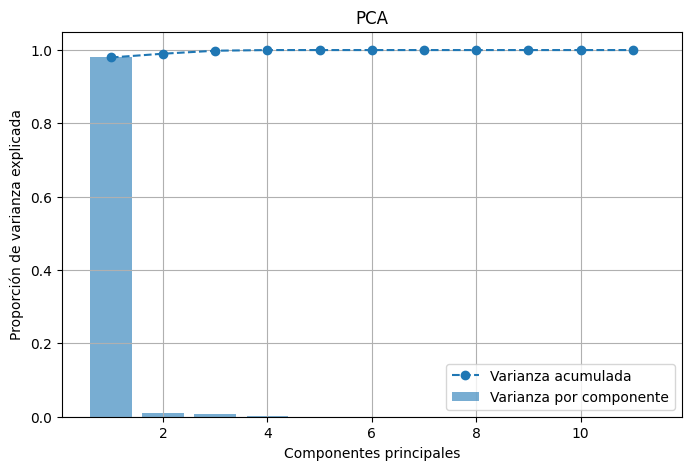

In [52]:
# Graficar que tanto afectan los datos para el PCA

var_exp = pca.explained_variance_ratio_
sum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp)+1), sum_var_exp, marker='o', linestyle='--', label="Varianza acumulada")
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.6, label="Varianza por componente")

plt.xlabel("Componentes principales")
plt.ylabel("Proporción de varianza explicada")
plt.title("PCA")
plt.legend()
plt.grid(True)
plt.show()

Casi todo el peso corresponde al primer componente. Sin embargo, el segundo y tercer componentes aún aportan una cantidad mínima de información

In [65]:
# Análisis con PCA ajustado a los eigenvectores más relevantes
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(num_df)

var_exp = pca.explained_variance_ratio_
print(var_exp)

[0.97972983 0.01030583 0.0081582 ]


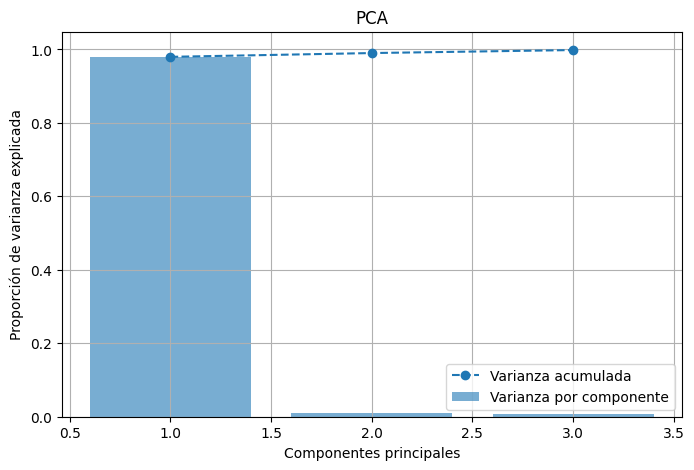

In [66]:
# Graficar que tanto afectan los datos para el PCA ajustado

var_exp = pca.explained_variance_ratio_
sum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp)+1), sum_var_exp, marker='o', linestyle='--', label="Varianza acumulada")
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.6, label="Varianza por componente")

plt.xlabel("Componentes principales")
plt.ylabel("Proporción de varianza explicada")
plt.title("PCA")
plt.legend()
plt.grid(True)
plt.show()